<a href="https://colab.research.google.com/github/pavan-kolachanakota/EDUTRAION/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Model Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127
R-squared Score: 0.91
Mean Squared Error: 2.91

Sample Predictions:
TV: 163.3, Radio: 31.6, Newspaper: 52.9 --> Predicted Sales: 17.03
TV: 195.4, Radio: 47.7, Newspaper: 52.9 --> Predicted Sales: 20.41
TV: 292.9, Radio: 28.3, Newspaper: 43.2 --> Predicted Sales: 23.72
TV: 11.7, Radio: 36.9, Newspaper: 45.2 --> Predicted Sales: 9.27
TV: 220.3, Radio: 49.0, Newspaper: 3.2 --> Predicted Sales: 21.68
TV: 75.1, Radio: 35.0, Newspaper: 52.7 --> Predicted Sales: 12.57
TV: 216.8, Radio: 43.9, Newspaper: 27.2 --> Predicted Sales: 21.08
TV: 50.0, Radio: 11.6, Newspaper: 18.4 --> Predicted Sales: 8.69
TV: 222.4, Radio: 3.4, Newspaper: 13.1 --> Predicted Sales: 17.24
TV: 175.1, Radio: 22.5, Newspaper: 31.5 --> Pred

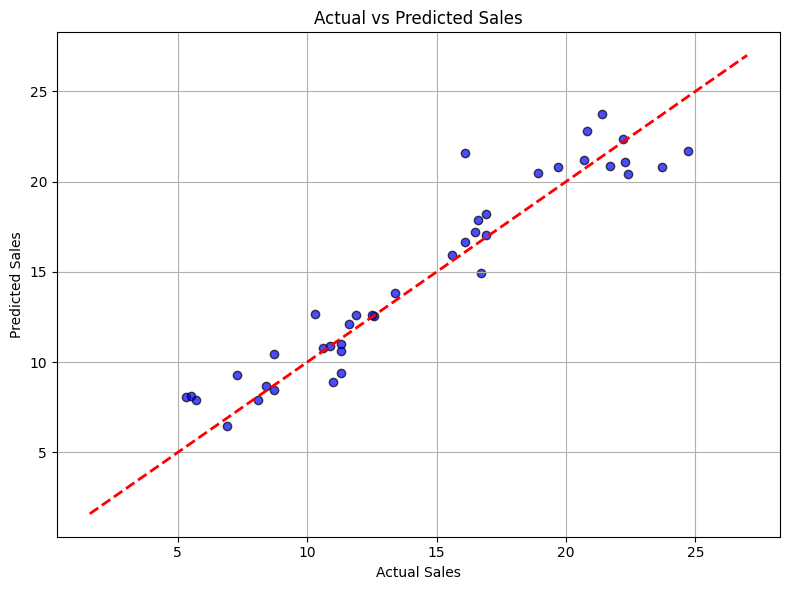

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("/content/advertising.csv")
print(df.head())

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

print("\nSample Predictions:")
for i in range(10):
    input_vals = X_test.iloc[i].values
    print(f"TV: {input_vals[0]}, Radio: {input_vals[1]}, Newspaper: {input_vals[2]} --> Predicted Sales: {y_pred[i]:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()
